# Visualize Data with Python
## Gaming habits and psychological well-being

### 1. Importing the data

In [1]:
# Importing the libraries I'll be using
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# And importing our dataset
gaming_study = pd.read_csv('GamingStudy_data.csv', encoding='windows-1252', index_col=0)

# Previewing the first 5 rows
print(gaming_study.head())

# And getting a summary for the columns
gaming_study.info()


    Zeitstempel  GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  \
1  42052.004366     0     0     0     0     1     0     0   
2  42052.006803     1     2     2     2     0     1     0   
3  42052.038599     0     2     2     0     0     3     1   
4  42052.068037     0     0     0     0     0     0     0   
5  42052.089478     2     1     2     2     2     3     2   

                   GADE  SWL1  ...  Birthplace    Residence  Reference  \
1  Not difficult at all     3  ...         USA          USA     Reddit   
2    Somewhat difficult     3  ...         USA          USA     Reddit   
3  Not difficult at all     2  ...     Germany      Germany     Reddit   
4  Not difficult at all     2  ...         USA          USA     Reddit   
5        Very difficult     2  ...         USA  South Korea     Reddit   

                                           Playstyle  accept GAD_T  SWL_T  \
1                                       Singleplayer  Accept     1     23   
2              Multiplayer - onlin

The Dataset is made of a high number of columns, consisting of the following information:
|VARIABLE's	|TYPE	|EXPLANATION|
|---|---|---|
|Zeitstempel	|Excel DateTime	|Time stamp|
|Reference	|string	|Where they know the study from|
|Accept	|string	|Accepted consent form|
|Hours	|int	|Hours played per week|
|streams	|int	|Additionnal hours dealing with the game other than playing|
|Game	|string	|Which game is played the most|
|Platform	|string	|Which platform is used the most|
|earnings	|string	|Earnings related to gaming (multiple choice plus 'Other')|
|whyplay	|string	|Motivation for playing (multiple choice plus 'Other')|
|Playstyle	|string	|Do they play online or offline? (single choice plus 'Other')|
|League	|string	|Which League are they in (game-sppecific ranking, free-text)|
|highestleague	|string	|Which League was their highest ever (game-sppecific ranking, free-text)|
|SPIN_T	|int	|total SPIN score|
|SPIN (1-17)	|int	|individual SPIN item scores|
|GAD_T	|int	|total GAD score|
|GAD (1-7)	|int	|individual GAD item scores|
|GADE|string| GAD score difficulty on daily life|
|SWL_T	|int	|total SWL score|
|SWL (1-5)	|int	|individual SWL item scores|
|Narcissism	|int	|SINS score|
|Birthplace	|int	|Country of birth in English|
|Birthplace_ISO3	|string	|Country of birth in ISO3 format|
|Residence	|string	|Country of residence in English|
|Residence_ISO3	|string	|Country of residence in ISO3 format|
|Age	|int	|Age in years|
|Work	|string	|Occupation status (single choice)|
|Degree	|string	|Highest degree (single choice)|
|Gender	|string	|Gender (single choice)|

### 2. Cleaning the Data

For our data analysis, the data types make sense for the data stored in the columns, the exception being columns that were expected to be `int`, but because there's values missing it shows up as `float`. There's a high number of columns, but there's some that are not needed, such as the individual scores used to calculate the SPIN, GAD and SWL Total scores. There is also an empty column `highestleague`, that we also can drop. Brithplace countries and Residence countries are also repeated columns, appearing again as their ISO3 codes. For ease of reading, I'll drop the ISO3 columns. The `Zeitstempel` column, that collects the timestamp the survey was submitted, and the `accept` column where it's stored if the person accepted the consent is also unnecessary.

While there are other columns that have missing values, I don't think the missing values are high number enough to invalidate the data in those columns.

Dropping the unnecessary columns:

In [2]:
gaming_study = gaming_study.drop(columns = ['Zeitstempel', 'accept', 'highestleague', \
                            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', \
                            'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', \
                            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5',\
                            'Birthplace_ISO3', 'Residence_ISO3'])

From the data analysis, there are also some columns that I think should be renamed so we can better understand the data in them:

|Original|New Name|
|---|---|
|Hours|Hours_week|
|streams|Additional_hours|
|Birthplace|Birth_country|
|Residence|Residence_country|
|Work|Occupation|
|Degree|Education|
|whyplay|Motivation|
|earnings|Earnings|
|Narcissism|SINS_T|

In [3]:
gaming_study.rename(columns={'Hours': 'Hours_week', 'streams': 'Additional_hours', 'Birthplace': 'Birth_country', 'Residence': 'Residence_country', \
                  'Work': 'Occupation', 'Degree': 'Education', 'whyplay': 'Motivation', 'earnings': 'Earnings', 'Narcissism': 'SINS_T'}, inplace=True)

Let's investigate our updated DataFrame so we can get some more information:

In [4]:
print(gaming_study.info())
print(gaming_study.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 13464 entries, 1 to 14250
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GADE               12815 non-null  object 
 1   Game               13464 non-null  object 
 2   Platform           13464 non-null  object 
 3   Hours_week         13434 non-null  float64
 4   Earnings           13464 non-null  object 
 5   Motivation         13464 non-null  object 
 6   League             11612 non-null  object 
 7   Additional_hours   13364 non-null  float64
 8   SINS_T             13441 non-null  float64
 9   Gender             13464 non-null  object 
 10  Age                13464 non-null  int64  
 11  Occupation         13426 non-null  object 
 12  Education          11887 non-null  object 
 13  Birth_country      13464 non-null  object 
 14  Residence_country  13464 non-null  object 
 15  Reference          13449 non-null  object 
 16  Playstyle          13464 no

By analysing the descriptive summaries of the columns, it can be noted that there's high standart deviation for the `Hours_week` and `Additional_hours` columns, which indicates the likelyhood of outliers, also, the maximum values for those two columns are '8000' and '9000', which are clearly impossible, so I'll check the 10 maximum values for hours played:

In [5]:
max_hours= gaming_study.sort_values(by='Hours_week', ascending=False).iloc[:10]
print(max_hours['Hours_week'])

4046     8000.0
9944      420.0
9439      160.0
14056     150.0
3267      140.0
8024      140.0
4575      120.0
9247      120.0
653       120.0
4268      120.0
Name: Hours_week, dtype: float64


From analysing this piece of information, I can see that there are some unrealistic values, as a week has 168 hours, some values are clearly impossible, sucha as gaming 8000, 420, or even 160 hours a week, as examples. Upon some investigating, I found information from studies that indicate most harcore gamers play up to 50 hours a week, with maximum at 80 (Consumer Technology Association (U.S., 2022) = 37 hours/week, Niko Partners (China) = 42 hours/week,NPD / TechSpot (U.S.) = 48.5 hours/week).
Even though this information is clearly impossible, I decided to keep those values in the database, to check if there is any correlations between those values and the wellbeing scores, only removing the two highest values as, despite being impossible, are trully outliers and skew the data enormously.

In [6]:
# Removing rows that have weekly hours greater than 168 (actual hours in a week)
gaming_study.drop(gaming_study[gaming_study['Hours_week'] > 168].index, inplace = True)

# Printing maximum values to confirm
max_hours= gaming_study.sort_values(by='Hours_week', ascending=False).iloc[:10]
print(max_hours['Hours_week'])

9439     160.0
14056    150.0
8024     140.0
3267     140.0
9247     120.0
653      120.0
4268     120.0
4575     120.0
12705    112.0
11227    110.0
Name: Hours_week, dtype: float64


I'll now check the values in the columns `Motivation` and `League`:

In [7]:
print(gaming_study.Motivation.value_counts(), '\n')
print(gaming_study.League.value_counts())

Motivation
having fun                                   5289
improving                                    4927
winning                                      2090
relaxing                                      654
All of the above                               26
                                             ... 
Winning 55% improving 45%                       1
winning, improving AND having fun               1
talking to irl friends                          1
Forgetting about my drug addiction              1
Having fun and improving at the same time       1
Name: count, Length: 406, dtype: int64 

League
Gold                                                                          970
Silver                                                                        650
Platinum                                                                      635
Diamond                                                                       549
gold                                                           

For the sake of consistency, I'm changing the values on those two columns to Tile case, and checking the values again:

In [8]:
gaming_study['Motivation'] = gaming_study['Motivation'].str.title()
gaming_study['League'] = gaming_study['League'].str.title()

print(gaming_study.Motivation.value_counts(), '\n')
print(gaming_study.League.value_counts())

Motivation
Having Fun                                   5289
Improving                                    4927
Winning                                      2090
Relaxing                                      654
All Of The Above                               49
                                             ... 
Talking To Irl Friends                          1
Forgetting About My Drug Addiction              1
Having Fun And Improving At The Same Time       1
Winning/Improving                               1
Both Winning And Improving                      1
Name: count, Length: 376, dtype: int64 

League
Gold                                             1292
Silver                                            866
Platinum                                          803
Diamond                                           701
Unranked                                          383
                                                 ... 
Gold 1 (Plat Promos Atm)                            1
Diamond 4 (Le

Here, we can see the number of unique values for the `Motivation` and the `League` decreased, meaning that there were some identical answers that only differed on the casing of the font used. There are still a lot of unique values on both columns, with `Motivation` totalling 377 different answers and `League` totaling 1259.

From analysing the DataFrame, it's also possible to see that two columns that should not have `NULL` values on them actually have a few:

**`Occupation`** - 38 `NULL` values - this might be due to errors when collecting the data, but is only 0.28% of the overall data, so we can substitue those values for "Unemployed / between jobs" that was one of the valid answers of the survey, without skewing our data too much.

**`Education`** - 1577 `NULL` values, while some might be due to errors in collecting the data, the most should be from selecting the option "None" on the survey, so we can change those values on the DataFrame for the string "None".

Bellow are shown the unique values of both columns:

In [9]:
print ('Before changing NULL:')
print(gaming_study.Occupation.info(), '\n')
print(gaming_study.Occupation.value_counts(), '\n')
print(gaming_study.Education.info(),'\n')
print(gaming_study.Education.value_counts(), '\n')

gaming_study = gaming_study.fillna({'Occupation': 'Unemployed / between jobs','Education': 'None'})

print ('After changing NULL:')
print(gaming_study.Occupation.info(), '\n')
print(gaming_study.Occupation.value_counts(), '\n')
print(gaming_study.Education.info(),'\n')
print(gaming_study.Education.value_counts())


Before changing NULL:
<class 'pandas.core.series.Series'>
Index: 13462 entries, 1 to 14250
Series name: Occupation
Non-Null Count  Dtype 
--------------  ----- 
13424 non-null  object
dtypes: object(1)
memory usage: 210.3+ KB
None 

Occupation
Student at college / university    7073
Employed                           2733
Student at school                  2229
Unemployed / between jobs          1389
Name: count, dtype: int64 

<class 'pandas.core.series.Series'>
Index: 13462 entries, 1 to 14250
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
11885 non-null  object
dtypes: object(1)
memory usage: 210.3+ KB
None 

Education
High school diploma (or equivalent)    8560
Bachelor (or equivalent)               2687
Master (or equivalent)                  546
Ph.D., Psy. D., MD (or equivalent)       92
Name: count, dtype: int64 

After changing NULL:
<class 'pandas.core.series.Series'>
Index: 13462 entries, 1 to 14250
Series name: Occupation
Non-Null Count  Dtype 
-------

When analizing the `Playstyle` column, we see it has 298 different answers, so we can aglomerate all of the other categories into one, named `Other`, the same happening with the `Earnings` columns, that has 314 different values for 3 options:

In [10]:
# Getting insight into the 'Playstyle column'
print('\nOriginal:')
print('\nPlaystyle:', gaming_study.Playstyle.describe())
print('\nEarnings:',gaming_study.Earnings.describe())

# Creating a list of the values we'll have in our columns after cleaning
valid_playstyles = ['Singleplayer', 'Multiplayer - offline (people in the same room)', 'Multiplayer - online - with strangers',
    'Multiplayer - online - with online acquaintances or teammates', 'Multiplayer - online - with real life friends', 'Other']
valid_earnings = ['I earn a living by playing this game', 'I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)',
                  'I play for fun', 'Other']

# on the column 'Playstyle', if value is in our list, keeps it, if not, replaces with 'Other'
gaming_study['Playstyle'] = gaming_study['Playstyle'].where(gaming_study['Playstyle'].isin(valid_playstyles), 'Other')
gaming_study['Earnings'] = gaming_study['Earnings'].where(gaming_study['Earnings'].isin(valid_earnings), 'Other')


# Confirming changes
print('\nAltered:')
print('\nPlaystyle:', gaming_study.Playstyle.describe())
print('\nEarnings:',gaming_study.Earnings.describe())


Original:

Playstyle: count                                             13462
unique                                              297
top       Multiplayer - online - with real life friends
freq                                               5564
Name: Playstyle, dtype: object

Earnings: count              13462
unique               313
top       I play for fun
freq               12112
Name: Earnings, dtype: object

Altered:

Playstyle: count                                             13462
unique                                                6
top       Multiplayer - online - with real life friends
freq                                               5564
Name: Playstyle, dtype: object

Earnings: count              13462
unique                 4
top       I play for fun
freq               12112
Name: Earnings, dtype: object


### 3. Creating Visualizations
Now that the DataFrame is ready and clean, we can proceed with creating visualisations.

I decided to split my visualisations into four different parts, each intending to answer a specific set of questions:

##### 1. Demographic data:
1. Gender disparity in gaming
2. Education in gaming
3. Occupation in gaming
4. Age in gaming

##### 2. Basis data:
1. Platform used
2. Playstyle (Online vs. Offline)
3. Players with earnings
   1. Correlating with Playstyle

##### 3. Score analysis:
1. General scores
2. by age
3. by gender
4. by education
5. Online vs. Offline

##### 4. Hours played analysis:
1. Hours played:
   1. Education
   2. Scores
       1. Under 50 hours of play per week
       2. Over 50 hours of play per week
2. Hours played and additional hours:
   1. Education
   2. Scores
       1. Under 50 hours of play per week
       2. Over 50 hours of play per week

#### 3.1 Demographic Data
##### 3.1.1 Gender Disparity in gaming

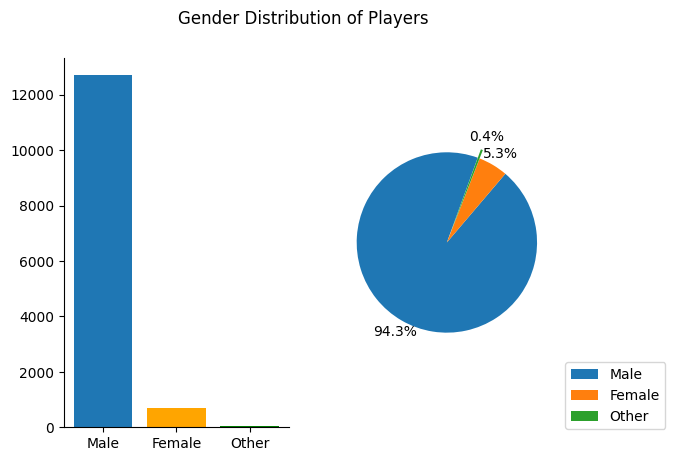

In [11]:
# Calculating the number of rows for each value of Gender
gender_counts = gaming_study.Gender.value_counts()

plt.suptitle('Gender Distribution of Players')

# Creating subplot on left
plt.subplot(1,2,1)

# Plot bar chart
plt.bar(x = gender_counts.index, height = gender_counts, color = ['#1f77b4', 'orange', 'green'])
plt.gca().spines[['right', 'top']].set_visible(False) # gca = Get Current Axis = to turn the top and right spine off

# Creating subplot on right
plt.subplot(1,2,2)

# Plot pie chart
plt.pie(x = gender_counts, labels= None, # removes the labels from the outside of the pie chard, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        explode = [0, 0, 0.1], # pulls a slice out so it's more visible
        pctdistance= 1.15) # puts percentages outside the pie chart 

plt.legend(bbox_to_anchor = (1.5,0), labels =gender_counts.index)


plt.show()

We can see that the vast majority of the population who answered the survey was male, with a very small representation from people who don't identify as neither 'male' nor 'female'.

##### 3.1.2 Education in gaming

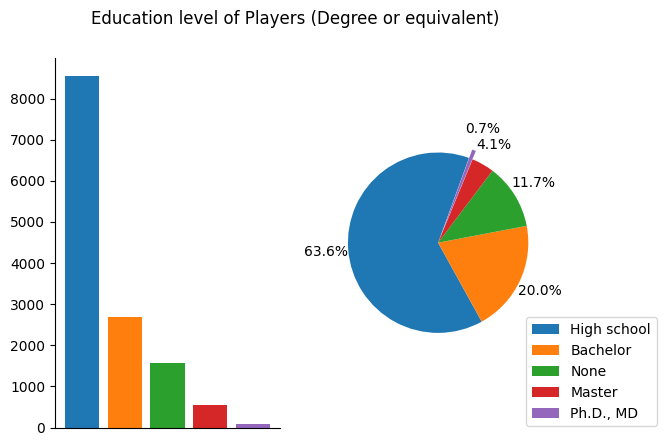

In [12]:
# Calculating the number of rows for each value of Education
education_counts = gaming_study.Education.value_counts()

plt.suptitle('Education level of Players (Degree or equivalent)')

# Creating subplot on left
plt.subplot(1,2,1)

# Plot bar chart
plt.bar(x = education_counts.index, height = education_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

# Creating subplot on right
plt.subplot(1,2,2)

# Plot pie chart
plt.pie(x = education_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        explode = [0, 0, 0, 0, 0.1], # pulls a slice out so it's more visible
        pctdistance= 1.25) # puts percentages outside the pie chart 

plt.legend(bbox_to_anchor = (1.5,0.2), labels =['High school', 'Bachelor', 'None', 'Master', 'Ph.D., MD'])

plt.show()

As seen in this example, most gamers within our sample have a bacherlor degree or equivalent, with the number of players decreasing as the level of education progresses. Wer can make two assumptions: First, that there are fewer people in general high higher education levels in the general population, and secondly, that having a higher education level might also impact on the free time a person has to play videogames.

Of note is the fact that people who answered 'None' represent about 12% of the survey results, and this might be people who are still enrolled in lower levels of education, such as high or middle school, or people who abandoned education to pursue other ways.

##### 3.1.3 Occupation in gaming

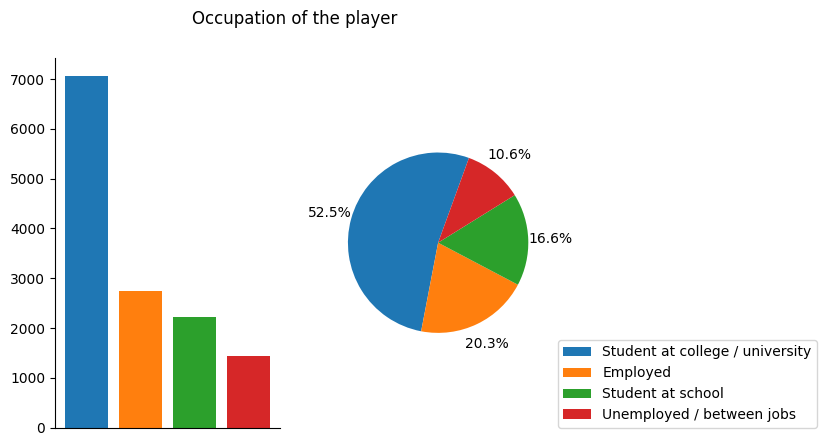

In [13]:
# Calculating the number of rows for each value of Occupation
occupation_counts = gaming_study.Occupation.value_counts()

plt.suptitle('Occupation of the player')

# Creating subplot on left
plt.subplot(1,2,1)

# Plot bar chart
plt.bar(x = occupation_counts.index, height = occupation_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

# Creating subplot on right
plt.subplot(1,2,2)

# Plot pie chart
plt.pie(x = occupation_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        pctdistance= 1.25) # puts percentages outside the pie chart 

plt.legend(bbox_to_anchor = (1,0.1), labels =occupation_counts.index)

plt.show()

In this graph we can see the majority of the players answering the survey was students (69.1%), with more than half the players currently enrolled at college or university.

##### 3.1.4 Age in gaming

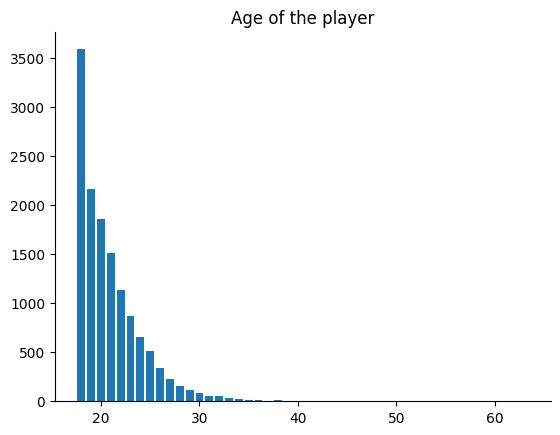

In [14]:
# Calculating the number of rows for each value of Occupation
age_counts = gaming_study.Age.value_counts()

plt.title('Age of the player')

# Plot bar chart
plt.bar(x = age_counts.index, height = age_counts)

plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

plt.show()

On our Dataset we can see that as the age increases, the number of players decrease.

#### 3.2 Basic Data
##### 3.2.1 Platform used

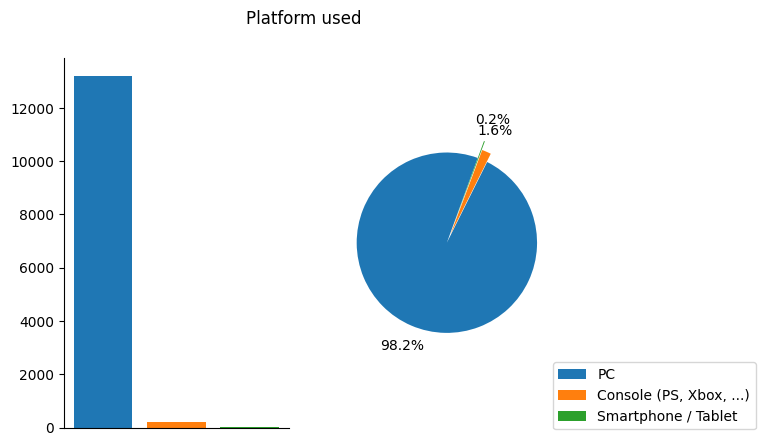

In [15]:
# Calculating the number of rows for each Platform
platform_counts = gaming_study.Platform.value_counts()

plt.suptitle('Platform used')

# Creating subplot on left
plt.subplot(1,2,1)

# Plot bar chart
plt.bar(x = platform_counts.index, height = platform_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

# Creating subplot on right
plt.subplot(1,2,2)

# Plot pie chart
plt.pie(x = platform_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        pctdistance= 1.25, # puts percentages outside the pie chart 
        explode = [0, 0.1, 0.2]) # pulls two slices out so the bar chart is more visible

plt.legend(bbox_to_anchor = (1.9,0), labels =platform_counts.index)

plt.show()

From here it's possible to see the majority of the players who answered the survey plays mainly on the PC, but, as we can see in the data and the survey, the questionnaire was mainly spread and distributed on Reddit, TeamLiquid and CrowFlower, webpages that are mainly accessed on the PC but that a lot of the users are PC users as well, so the collecting of the data was potentially unintentionally biased here.

##### 3.2.2 Online Vs. Offline play

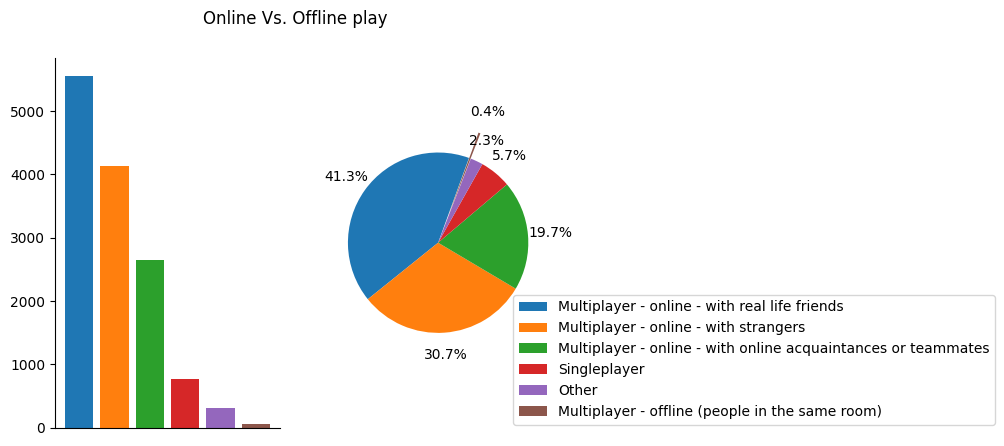

In [16]:
# Calculating the number of rows for each Platform
playstyle_counts = gaming_study.Playstyle.value_counts()

plt.suptitle('Online Vs. Offline play')

# Creating subplot on left
plt.subplot(1,2,1)

# Plot bar chart
plt.bar(x = playstyle_counts.index, height = playstyle_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

# Creating subplot on right
plt.subplot(1,2,2)

# Plot pie chart
plt.pie(x = playstyle_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        pctdistance= 1.25, # puts percentages outside the pie chart 
        explode = [0, 0, 0, 0, 0, 0.3])# pulls two slices out so the bar chart is more visible

plt.legend(bbox_to_anchor = (3,0.3), labels =playstyle_counts.index)

plt.show()

Over 90% of the players plays mostly online multiplayer games, and over 40% plays online with friends they know from real life.

##### 3.2.3 Players with earnings

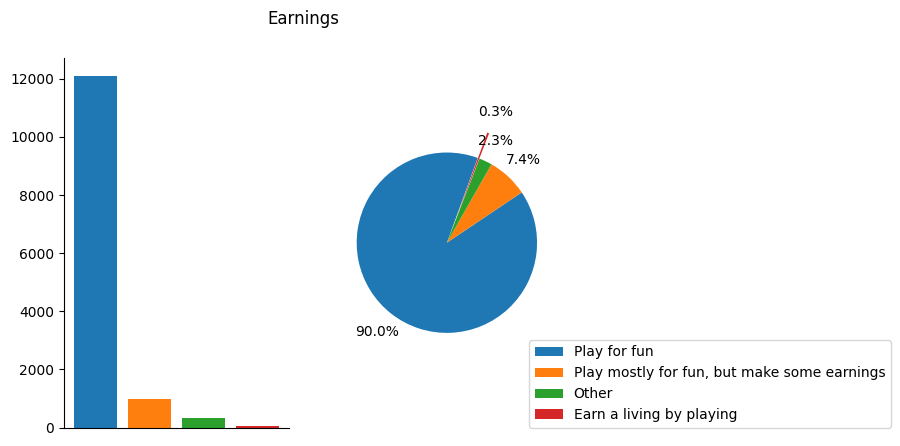

In [17]:
# Calculating the number of rows for each column
earning_counts = gaming_study.Earnings.value_counts()

plt.suptitle('Earnings')

# Creating subplot on left
plt.subplot(1,2,1)

# Plot bar chart
plt.bar(x = earning_counts.index, height = earning_counts, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.tick_params(axis='x', bottom=False, labelbottom=False) # ticks and labels along the bottom edge are off
plt.gca().spines[['right', 'top']].set_visible(False) # Spines are turned off

# Creating subplot on right
plt.subplot(1,2,2)

# Plot pie chart
plt.pie(x = earning_counts, labels= None, # removes the labels from the outside of the pie chart, as we have a legend
        autopct='%1.1f%%', # shows percentages
        startangle=70, # rotates so first slice starts at 12 o’clock
        pctdistance= 1.25, # puts percentages outside the pie chart 
        explode = [0, 0, 0, 0.3])# pulls two slices out so the bar chart is more visible

plt.legend(bbox_to_anchor = (2.5,0.1), labels = ['Play for fun', 'Play mostly for fun, but make some earnings', 'Other', 'Earn a living by playing'])

plt.show()

While the majority of players play just for fun, almost 8% of the players make some earnings from playing.

##### 3.2.3.A Correlating with playstyle

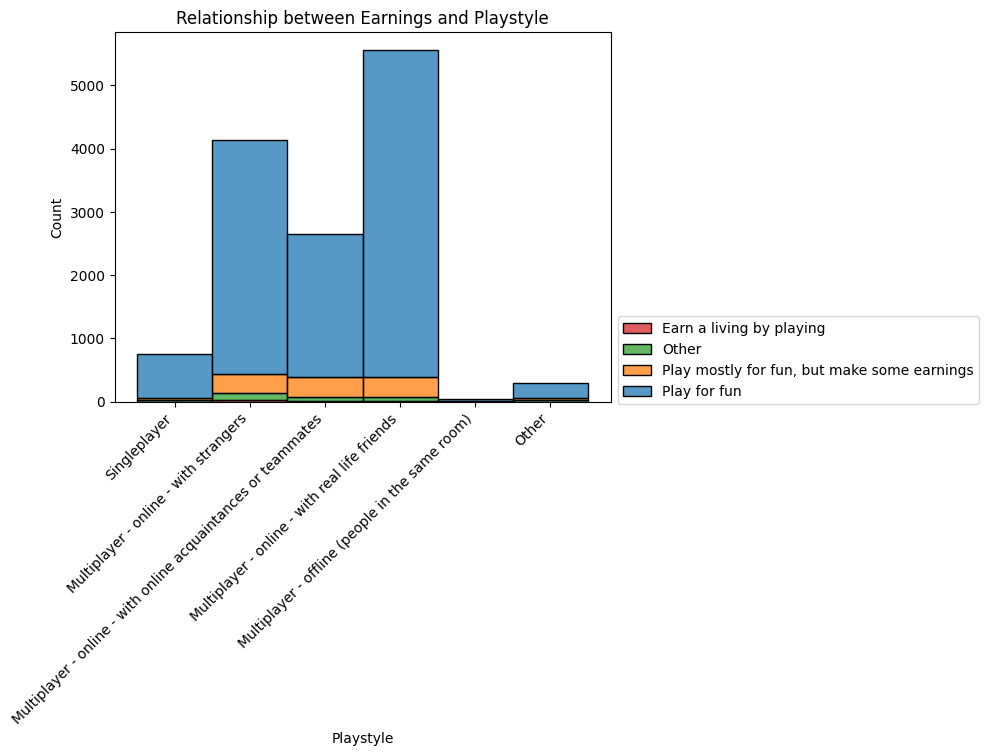

Zooming in on the X axis so it's possible to see Earnings better


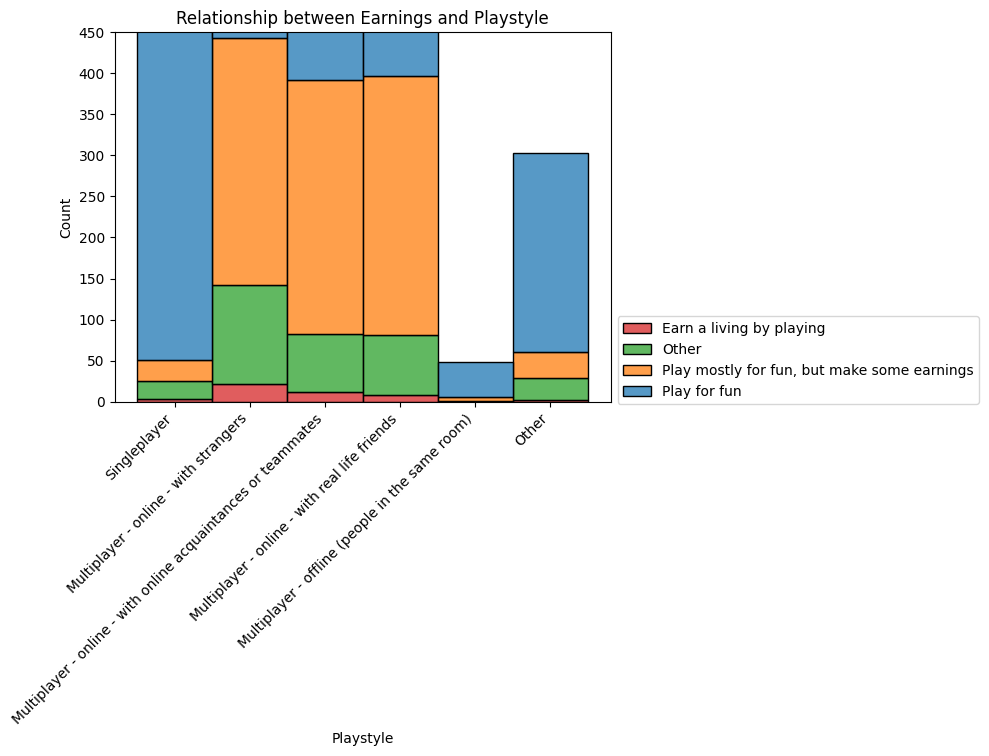

In [18]:
sns.histplot(data=gaming_study, x='Playstyle', hue='Earnings', multiple = 'stack')
plt.title("Relationship between Earnings and Playstyle")
plt.xticks(rotation=45, ha = 'right')

plt.legend(bbox_to_anchor = (1,0.25), labels = ['Earn a living by playing', 'Other', 'Play mostly for fun, but make some earnings', 'Play for fun'])

plt.show()

# Zoomed in graph
print('Zooming in on the X axis so it\'s possible to see Earnings better')

sns.histplot(data=gaming_study, x='Playstyle', hue='Earnings', multiple = 'stack')
plt.title("Relationship between Earnings and Playstyle")
plt.xticks(rotation=45, ha = 'right')

plt.legend(bbox_to_anchor = (1,0.25), labels = ['Earn a living by playing', 'Other', 'Play mostly for fun, but make some earnings', 'Play for fun'])

plt.ylim(0, 450)
plt.show()

We can see that the type of games that allow people to make most earnings are Online Multiplayer games.

#### 3.3 Score Analysis
##### 3.3.1 General scores

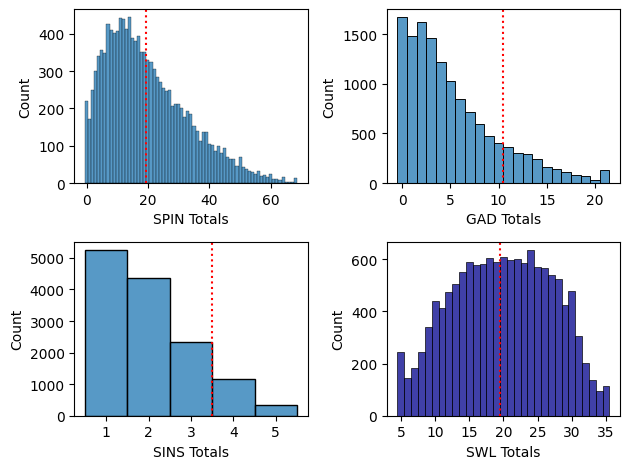

In [19]:
# Creating subplots for the 4 Scores we have: 
# SPIN for Social Phobia Inventory
# GAD for Social Anxiety Disorder
# SWL for Satisfaction with Life
# SINS for Single Item Narcissism Scale

# Of note is the fact that the lower the score the better for most scores, for SWL, the higher the score, the better the result.

# reshaping your DataFrame
#scores_table = gaming_study.melt(value_vars=['SPIN_T', 'GAD_T', 'SINS_T', 'SWL_T'], var_name='Score_Type', value_name='Score')

# Creating a subplot for our graphs
# SPIN
plt.subplot(2,2,1)

sns.histplot(data = gaming_study, x='SPIN_T', bins=69, discrete = True)
plt.xlabel('SPIN Totals')

# Concern line
plt.axvline(x = 19.5, color = 'r', linestyle = ':')

# GAD
plt.subplot(2,2,2)

sns.histplot(data = gaming_study, x='GAD_T', bins=22, discrete = True)
plt.xlabel('GAD Totals')

# Concern line
plt.axvline(x = 10.5, color = 'r', linestyle = ':')

# SINS
plt.subplot(2,2,3)

sns.histplot(data = gaming_study, x='SINS_T', bins=5, discrete = True )
plt.xlabel('SINS Totals')
plt.xticks([1,2,3,4,5])


# Concern line
plt.axvline(x = 3.5, color = 'r', linestyle = ':')

# SWL
plt.subplot(2,2,4)

sns.histplot(data = gaming_study, x='SWL_T', bins=31, color = 'darkblue', discrete = True)
plt.xlabel('SWL Totals')
plt.xticks([5,10,15,20,25,30,35])

# Concern line
plt.axvline(x = 19.5, color = 'r', linestyle = ':')

plt.tight_layout()
plt.show()

Above there are four graphs showcasing the average total scores from the players who answered the survey.
For SPIN (Social Phobia Inventory), GAD (Generalized Anxiety Disorder) and SINS (Single Score Narcissism), the lower the value, the better the mental well-being and less cause for concern. The opposite occurs on the SWL (Satisfaction with life) plot where the higher the value, the more satisfied the person is, hence the plots representing the SWL score will be colored slightly different.
- SPIN, Social Phobia Inventory: normal range 0-19, can go up to 68
- GAD, Generalized Anxiety Disorder: normal range 0-10, can go up to 21
- SINS, Adapted from the Single Item Narcissistic Scale, normal range 1-3, can go up to 5
- SWL, Satisfaction With Life, normal range 20-35, can go as low as 5

From out data, it's possible to see the SPIN, GAD and SINS scores follow a Unimodal Right-skewed distribution, where most of the players are within the normal range for those scores.
The SWL score is arranged in a Normal distribution, with median value arround the normal value for this score.

##### 3.3.2 By age

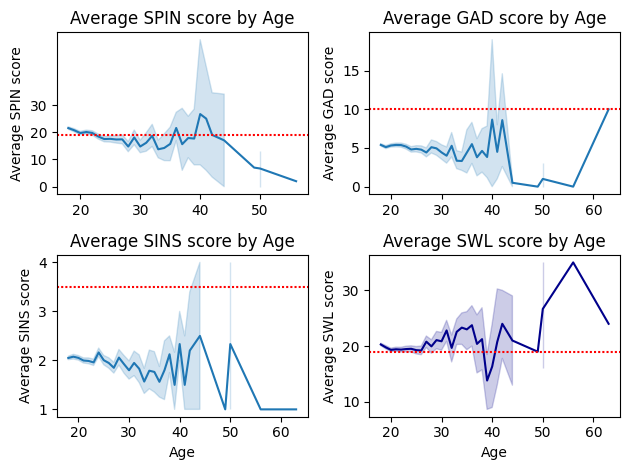

In [20]:
# creating subplots to display the graphs
plt.subplot(2,2,1)

# Plot line graph
sns.lineplot(data=gaming_study, x='Age', y='SPIN_T')

plt.title('Average SPIN score by Age')
plt.ylabel('Average SPIN score')
plt.yticks([0,10,20,30])
plt.xlabel('')

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

# second subplot
plt.subplot(2,2,2)

# Plot line graph
sns.lineplot(data=gaming_study, x='Age', y='GAD_T')

plt.title('Average GAD score by Age')
plt.ylabel('Average GAD score')
plt.yticks([0,5,10,15])
plt.xlabel('')

# Adding concern line
plt.axhline(y = 10, color = 'red', dashes = (1,1))

# creating third subplot
plt.subplot(2,2,3)

# Plot line graph
sns.lineplot(data=gaming_study, x='Age', y='SINS_T')

plt.title('Average SINS score by Age')
plt.ylabel('Average SINS score')
plt.yticks([1,2,3,4])

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

# fourth subplot
plt.subplot(2,2,4)

# Plot line graph
sns.lineplot(data = gaming_study, x = 'Age', y = 'SWL_T', color = 'darkblue')

plt.title('Average SWL score by Age')
plt.ylabel('Average SWL score')

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

plt.tight_layout()
plt.show()


From correlating the age with the average scores, it's possible to identify that overall, the population who answered the questionnaire sits well within the normal values for these scores. Of note is on the SPIN Score, people under mid-20s and people around 40 years old seem to have a spike triggering their social phobia, might be factors due to study/work?
Also, on General Anxiety score, players approaching 60 years old seem to be more anxious, and on the SWL scale, there is a huge drop around 39 years old.

##### 3.3.3 By gender

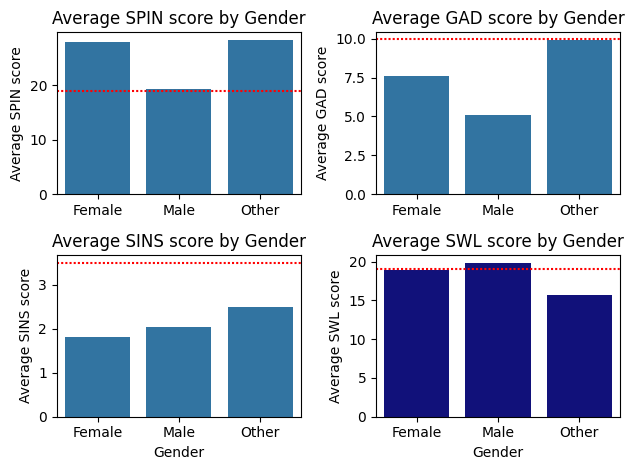

In [21]:
# creating subplots to display the graphs
plt.subplot(2,2,1)

# Group by age and compute the mean of SPIN_T
avg_spin_gender = gaming_study.groupby('Gender', as_index=False)['SPIN_T'].mean()

# Plot line graph
sns.barplot(data=avg_spin_gender, x='Gender', y='SPIN_T')

plt.title('Average SPIN score by Gender')
plt.ylabel('Average SPIN score')
plt.xlabel('')

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

# second subplot
plt.subplot(2,2,2)

# Group by age and compute the mean of GAD
avg_gad_gender = gaming_study.groupby('Gender', as_index=False)['GAD_T'].mean()

# Plot line graph
sns.barplot(data=avg_gad_gender, x='Gender', y='GAD_T')

plt.title('Average GAD score by Gender')
plt.ylabel('Average GAD score')
plt.xlabel('')

# Adding concern line
plt.axhline(y = 10, color = 'red', dashes = (1,1))

# creating third subplot
plt.subplot(2,2,3)

# Group by age and compute the mean of SPIN_T
avg_sins_gender = gaming_study.groupby('Gender', as_index=False)['SINS_T'].mean()

# Plot line graph
sns.barplot(data=avg_sins_gender, x='Gender', y='SINS_T')

plt.title('Average SINS score by Gender')
plt.ylabel('Average SINS score')

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

# fourth subplot
plt.subplot(2,2,4)

# Group by age and compute the mean of GAD
avg_swl_gender = gaming_study.groupby('Gender', as_index=False)['SWL_T'].mean()

# Plot line graph
sns.barplot(data=avg_swl_gender, x='Gender', y='SWL_T', color = 'darkblue')

plt.title('Average SWL score by Gender')
plt.ylabel('Average SWL score')

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

plt.tight_layout()
plt.show()


From cross-referencing the players genders with the scores, it's possible to see that female and non binary players have a higher social phobia, and while within the normal scores, have a higher generalized anxiety as well. Male players seem to be less impacted by those scores, having a higher Satisfaction with Life as well.

##### 3.3.4 By education

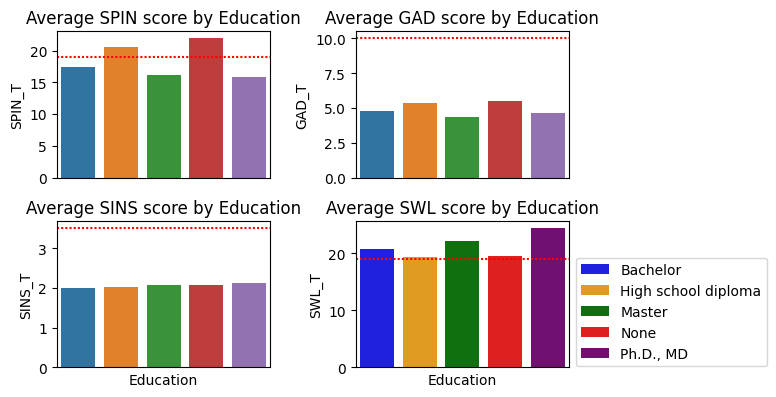

In [22]:
# Group by age and compute the mean of the scores
avg_spin_edu = gaming_study.groupby('Education', as_index=False)['SPIN_T'].mean()
avg_gad_edu = gaming_study.groupby('Education', as_index=False)['GAD_T'].mean()
avg_sins_edu = gaming_study.groupby('Education', as_index=False)['SINS_T'].mean()
avg_swl_edu = gaming_study.groupby('Education', as_index=False)['SWL_T'].mean()

# Shared palette for consistency across plots
hues = ['Bachelor', 'High school diploma', 'Master', 'None', 'Ph.D., MD']
palette = { 'Bachelor': 'blue', 'High school diploma': 'orange', 'Master': 'green', 'None': 'red', 'Ph.D., MD': 'purple'}

# Setting the data up on each graph
plt.subplot(2,2,1)

sns.barplot(data=avg_spin_edu, x='Education', y='SPIN_T', hue=hues, legend = False)
plt.title('Average SPIN score by Education')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('')

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

plt.subplot(2,2,2)

sns.barplot(data=avg_gad_edu, x='Education', y='GAD_T', hue=hues, legend = False)
plt.title('Average GAD score by Education')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('')

# Adding concern line
plt.axhline(y = 10, color = 'red', dashes = (1,1))

plt.subplot(2,2,3)

sns.barplot(data=avg_sins_edu, x='Education', y='SINS_T', hue=hues, legend = False)
plt.title('Average SINS score by Education')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('Education')

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,4)

sns.barplot(data=avg_swl_edu, x='Education', y='SWL_T', hue=hues, dodge=False, legend = True, palette = palette)
plt.title('Average SWL score by Education')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('Education')

plt.legend(bbox_to_anchor = (1,0.8))

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

#plt.tight_layout()
plt.show()

While looking at the scores by education achieved, players with high-school diplomas or equivalent and players without anyof these levels of education seem to have a lower satisfaction with life score, and average higher on the SPIN and GAD scores, but overall he scores are very similar, especially on the GAD, SINS and SWL scores.

##### 3.3.5 Online vs. Offline play

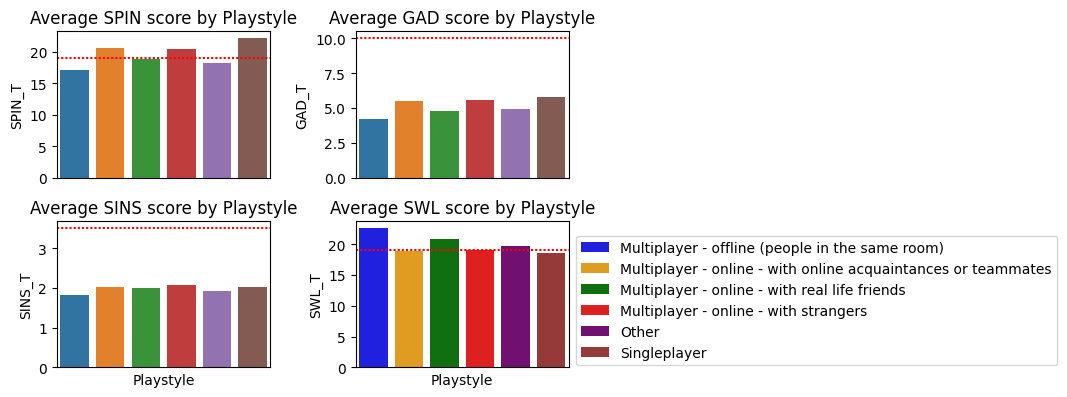

In [23]:
# Group by age and compute the mean of the scores
avg_spin_playstyle = gaming_study.groupby('Playstyle', as_index=False)['SPIN_T'].mean()
avg_gad_playstyle = gaming_study.groupby('Playstyle', as_index=False)['GAD_T'].mean()
avg_sins_playstyle = gaming_study.groupby('Playstyle', as_index=False)['SINS_T'].mean()
avg_swl_playstyle = gaming_study.groupby('Playstyle', as_index=False)['SWL_T'].mean()

# Setting the data up on each graph
plt.subplot(2,2,1)

# Setting color palette for last graph
palette = { 'Multiplayer - offline (people in the same room)': 'blue', 'Multiplayer - online - with online acquaintances or teammates': 'orange', 
            'Multiplayer - online - with real life friends': 'green', 'Multiplayer - online - with strangers': 'red', 'Other': 'purple', 
            'Singleplayer': 'brown'}

sns.barplot(data=avg_spin_playstyle, x='Playstyle', y='SPIN_T', hue='Playstyle', legend = False)
plt.title('Average SPIN score by Playstyle')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('')

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

plt.subplot(2,2,2)

sns.barplot(data=avg_gad_playstyle, x='Playstyle', y='GAD_T', hue='Playstyle', legend = False)
plt.title('Average GAD score by Playstyle')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('')

# Adding concern line
plt.axhline(y = 10, color = 'red', dashes = (1,1))

plt.subplot(2,2,3)

sns.barplot(data=avg_sins_playstyle, x='Playstyle', y='SINS_T', hue='Playstyle', legend = False)
plt.title('Average SINS score by Playstyle')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('Playstyle')

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,4)

sns.barplot(data=avg_swl_playstyle, x='Playstyle', y='SWL_T', hue='Playstyle', dodge=False, legend = True, palette = palette)
plt.title('Average SWL score by Playstyle')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('Playstyle')
plt.legend(bbox_to_anchor=(1,0.95))

# Adding concern line
plt.axhline(y = 19, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

#plt.tight_layout()
plt.show()

If we correlate the players playting style with the scores, it's apparent that players who coose to play offline, with people in the same room have slightly less SPIN, GAD and SINS score and a higher SWL score, followed with players who choose to play online with real life friends, while playing online with acquaintances and strangers get almost the exact same scores, and singleplayers have the worst scores accross all the variables. This data seems to indicate there might be a correlation between the playstyle of a person and their mental well-being, but more investigation would be necessary.

### 3.4 Hours played analysis
#### 3.4.1 Hours played
##### 3.4.1.A Education

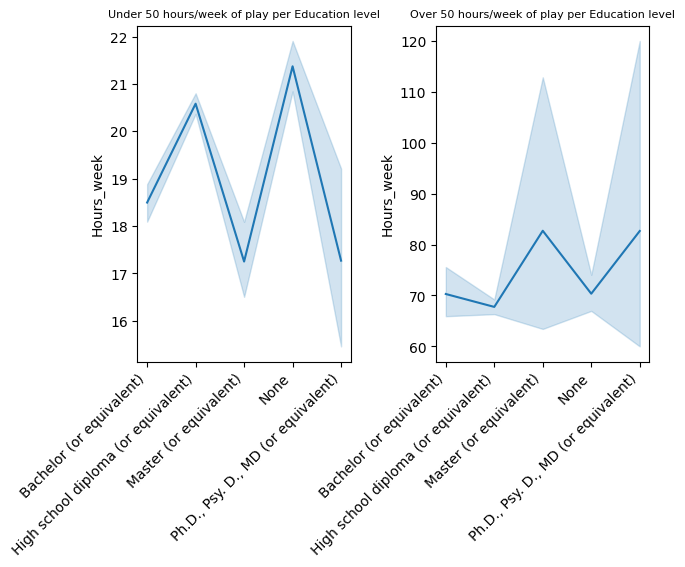

In [31]:
# Creating tables for players with less than 50 weekly play hours and over 50 weekly play hours
# Of note, the rows that don't have values in this column will be tossed aside.
under_50_hours = gaming_study[gaming_study.Hours_week <= 50]
under_50_hours = under_50_hours.sort_values(by=['Education'])
over_50_hours = gaming_study[gaming_study.Hours_week > 50]
over_50_hours = over_50_hours.sort_values(by=['Education'])

plt.subplot(1,2,1)
sns.lineplot(data = under_50_hours, x = 'Education', y ='Hours_week',)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('')
plt.title('Under 50 hours/week of play per Education level', size = 8)

plt.subplot(1,2,2)
sns.lineplot(data = over_50_hours, x = 'Education', y ='Hours_week')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('')
plt.title('Over 50 hours/week of play per Education level', size = 8)

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

plt.show()

As seen above, for users who reported realistic hours of play per week, the number of hours played diminishes as the level of education goes higher, for those who reported unrealistic hours of play per week, the inverse is true, which confirms that this bit of the data shouldn't be trusted, but where should the cut off be? 

##### 3.4.1.B Scores
##### 3.4.1.B.a Under 50 hours of play per week

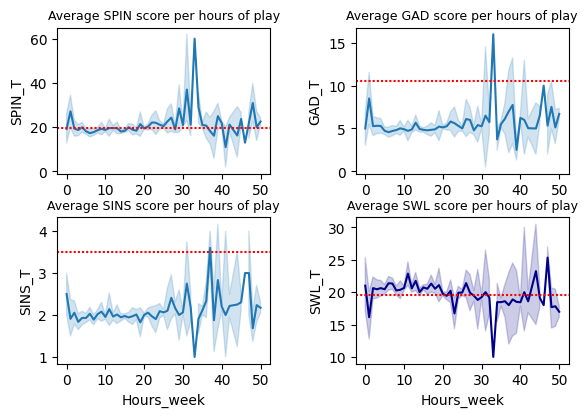

In [32]:
# Creating our subplots
plt.subplot(2,2,1)
sns.lineplot(data = under_50_hours, x = 'Hours_week', y = 'SPIN_T')
plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average SPIN score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,2)
sns.lineplot(data = under_50_hours, x = 'Hours_week', y = 'GAD_T')
plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average GAD score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 10.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,3)
sns.lineplot(data = under_50_hours, x = 'Hours_week', y = 'SINS_T')
plt.xticks([0,10,20,30,40,50])
plt.title('Average SINS score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,4)
sns.lineplot(data = under_50_hours, x = 'Hours_week', y = 'SWL_T', color = 'darkblue')
plt.xticks([0,10,20,30,40,50])
plt.title('Average SWL score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

#plt.tight_layout()
plt.show()

Looking at the scores for players who reported playing under 50 hours per week (which are values that I consider possible, with players who get close to 50 hours being harcore players), we can see for SPIN and GAD scores, there seems to be a spike around early thirties values, that coincides with a dip on the SINS and SWL score.

Even though the SPIN score having the spike at early thirties mentioned before and another at the early twenties hours, the average remains fairly consistent and on top of the acceptable values for this score. And despite some fluctuations on players who approach 40 and 50 hours per week, the scores are positive. 

Of note is also the SWL score that starting at 30 hours per week sees a decrease, with the average remaining under the acceptable score for concern for most of the remainder of the graph after the dip.

##### 3.4.1.B.b Over 50 hours of play per week

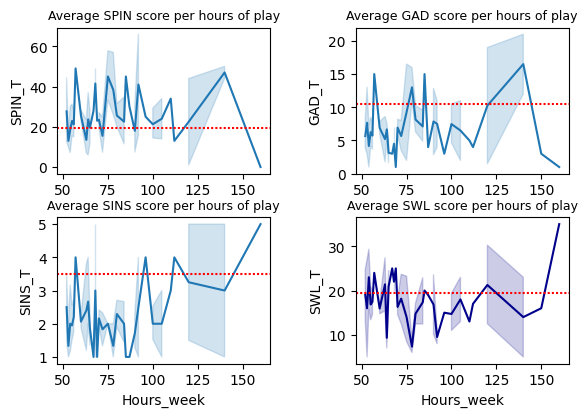

In [33]:
# Creating our subplots
plt.subplot(2,2,1)
sns.lineplot(data = over_50_hours, x = 'Hours_week', y = 'SPIN_T')
#plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average SPIN score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,2)
sns.lineplot(data = over_50_hours, x = 'Hours_week', y = 'GAD_T')
#plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average GAD score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 10.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,3)
sns.lineplot(data = over_50_hours, x = 'Hours_week', y = 'SINS_T')
#plt.xticks([0,10,20,30,40,50])
plt.title('Average SINS score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,4)
sns.lineplot(data = over_50_hours, x = 'Hours_week', y = 'SWL_T', color = 'darkblue')
#plt.xticks([0,10,20,30,40,50])
plt.title('Average SWL score per hours of play', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

#plt.tight_layout()
plt.show()

Looking at the data collected here, it's visible the scores are all over the place, and even though this bit of data is unrealistic and should not be trusted, is there any correlation between mental well-being and people and reporting extra hours of gaming?

#### 3.4.1 Hours played with aditional hours
##### 3.4.1.A Education

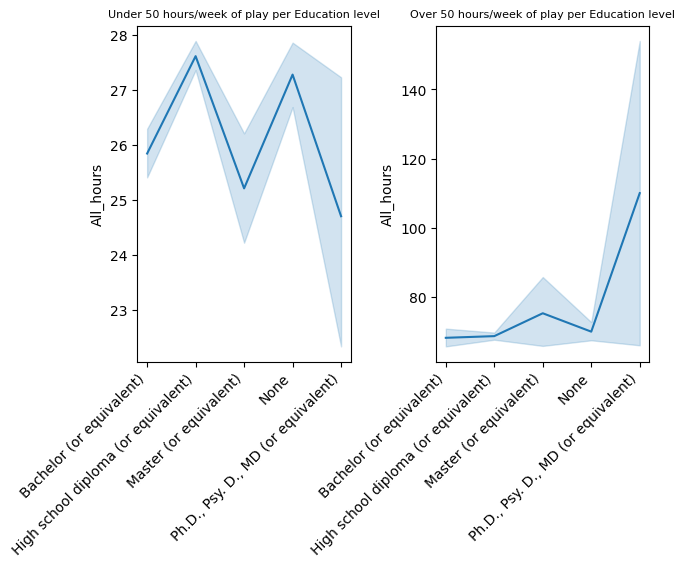

In [47]:
# Creating tables for players with less than 50 weekly total hours and over 50 weekly total hours
# Of note, the rows that don't have values in this column will be tossed aside.
gaming_study['All_hours'] = gaming_study.Hours_week + gaming_study.Additional_hours
under_50_add_hours = gaming_study[gaming_study.All_hours <= 50]
under_50_add_hours = under_50_add_hours.sort_values(by=['Education'])
over_50_add_hours = gaming_study[gaming_study.All_hours > 50]
over_50_add_hours = over_50_add_hours.sort_values(by=['Education'])

plt.subplot(1,2,1)
sns.lineplot(data = under_50_add_hours, x = 'Education', y ='All_hours',)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('')
plt.title('Under 50 hours/week of play per Education level', size = 8)

plt.subplot(1,2,2)
sns.lineplot(data = over_50_add_hours, x = 'Education', y ='All_hours')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('')
plt.title('Over 50 hours/week of play per Education level', size = 8)

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

plt.show()

When grouping the hours of gameplay with additional hours dedicated to the game, like streamings, youtube videos, tutorials, etc., the pattern for a total of hours up to 50 hours a week is very similar to the plot created when looking at only the hours of gameplay, but with higher values.

##### 3.4.2.B Scores
##### 3.4.2.B.a Under 50 total hours per week

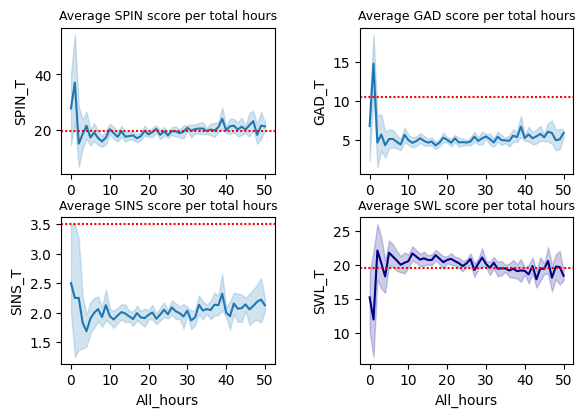

In [49]:
# Creating our subplots
plt.subplot(2,2,1)
sns.lineplot(data = under_50_add_hours, x = 'All_hours', y = 'SPIN_T')
plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average SPIN score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,2)
sns.lineplot(data = under_50_add_hours, x = 'All_hours', y = 'GAD_T')
plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average GAD score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 10.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,3)
sns.lineplot(data = under_50_add_hours, x = 'All_hours', y = 'SINS_T')
plt.xticks([0,10,20,30,40,50])
plt.title('Average SINS score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,4)
sns.lineplot(data = under_50_add_hours, x = 'All_hours', y = 'SWL_T', color = 'darkblue')
plt.xticks([0,10,20,30,40,50])
plt.title('Average SWL score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

#plt.tight_layout()
plt.show()

As with the values for play time only under 50 hours a week, the scores seem to be healthy, with a very slight worsening when increasing the number of hours dedicated to gaming, but still not enough for concern.

##### 3.4.2.B.a Over 50 total hours per week

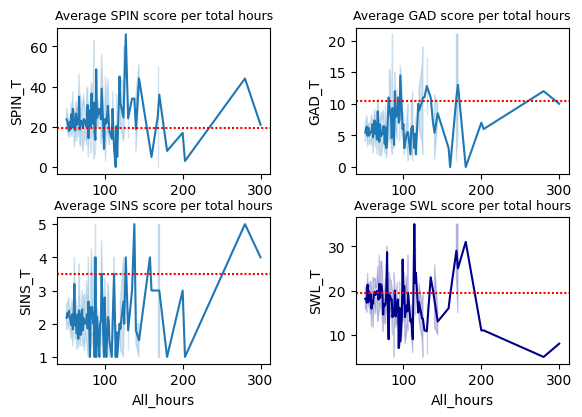

In [50]:
# Creating our subplots
plt.subplot(2,2,1)
sns.lineplot(data = over_50_add_hours, x = 'All_hours', y = 'SPIN_T')
#plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average SPIN score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,2)
sns.lineplot(data = over_50_add_hours, x = 'All_hours', y = 'GAD_T')
#plt.xticks([0,10,20,30,40,50])
plt.xlabel('')
plt.title('Average GAD score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 10.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,3)
sns.lineplot(data = over_50_add_hours, x = 'All_hours', y = 'SINS_T')
#plt.xticks([0,10,20,30,40,50])
plt.title('Average SINS score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 3.5, color = 'red', dashes = (1,1))

plt.subplot(2,2,4)
sns.lineplot(data = over_50_add_hours, x = 'All_hours', y = 'SWL_T', color = 'darkblue')
#plt.xticks([0,10,20,30,40,50])
plt.title('Average SWL score per total hours', size = 9)

# Adding concern line
plt.axhline(y = 19.5, color = 'red', dashes = (1,1))

# Arranging spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.4, hspace=0.3)

#plt.tight_layout()
plt.show()

Again. when trying to investigate the correlation between the total number of hours dedicated to gaming with the mental well-being scores, those scores are all disperse and all over the place.

### 4. Findings